<a href="https://colab.research.google.com/github/abhishekanand1289/Pandas/blob/main/Panda_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
# import like this
items_path = "/content/items (1).csv"
q1_path = "/content/quarter-1.csv"
q2_path = "/content/quarter-2.csv"
q3_path = "/content/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

In [3]:
q3.head()

,order_id,quantity,item_id,choice_description_id,item_price


###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [4]:
data = pd.concat([q1,q2,q3],keys=['Q1','Q2','Q3']).reset_index()
data['item_price'] = round(data['item_price'].apply(lambda x : x.replace('$','')).astype(float).apply(lambda x:x*85.41),2)

In [5]:
df = data.merge(items, on='item_id')
df.groupby(['level_0','item_name'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).drop_duplicates(subset=['level_0'])

,level_0,item_name,quantity
65,Q2,Chicken Bowl,394
17,Q1,Chicken Bowl,367


In [6]:
df.groupby(['level_0','item_name'])['item_price'].sum().reset_index().sort_values(by='item_price',ascending=False).drop_duplicates(subset=['level_0'])

,level_0,item_name,item_price
65,Q2,Chicken Bowl,326010.85
17,Q1,Chicken Bowl,301131.76


In [7]:
df

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price,item_name
0,Q1,0,1,1,1,1,289.54,Izze
1,Q1,1,1,1,2,2,289.54,Nantucket Nectar
2,Q1,2,2,2,4,3,1450.26,Chicken Bowl
3,Q1,3,4,1,7,6,790.04,Steak Soft Tacos
4,Q1,4,6,1,9,8,747.34,Chicken Crispy Tacos
...,...,...,...,...,...,...,...,...
4617,Q2,2342,1829,1,23,92,960.86,Veggie Burrito
4618,Q2,2343,1830,1,23,1043,960.86,Veggie Burrito
4619,Q2,2344,1832,1,10,116,747.34,Chicken Soft Tacos
4620,Q2,2345,1832,1,8,0,380.07,Chips and Guacamole


In [8]:
df.groupby(['level_0','order_id'])['item_price'].sum().reset_index().groupby('level_0')['item_price'].mean()

,item_price
level_0,
Q1,1018.890228
Q2,1015.400358


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [9]:
b2b = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
matches = pd.read_csv('/content/IPL_Matches_2008_2022 (2).csv')
a = b2b.merge(matches[['Season','ID']],on='ID')

In [10]:
data = a[a['isWicketDelivery']==1]
data = data[~data['kind'].isin(['run out','retired hurt', 'retired out','obstructing the field'])]
wickets = data.groupby(['Season','bowler'])['isWicketDelivery'].value_counts().reset_index()


In [11]:
d = a[~a['extra_type'].isin(['legbyes','byes'])]
rw = d.groupby(['Season','bowler']).agg({'total_run':'sum','bowler':'value_counts'}).rename(columns={'bowler':'balls'}).reset_index()
rw['Economy'] = rw['total_run']/rw['balls']*6

In [12]:
wickets.merge(rw, on=['Season','bowler']).sort_values(['count','Economy'],ascending=False).drop_duplicates(subset=['Season']).sort_values(by='Season')

,Season,bowler,isWicketDelivery,count,total_run,balls,Economy
22,2013,DJ Bravo,1.0,20,301.0,237,7.620253
141,2014,MM Sharma,1.0,23,452.0,319,8.501567
197,2015,DJ Bravo,1.0,26,426.0,315,8.114286
276,2016,B Kumar,1.0,23,490.0,401,7.331671
363,2017,B Kumar,1.0,26,369.0,310,7.141935
445,2018,AJ Tye,1.0,24,448.0,345,7.791304
560,2019,K Rabada,1.0,26,375.0,292,7.705479
644,2020/21,K Rabada,1.0,32,549.0,406,8.113300
714,2021,HV Patel,1.0,32,459.0,359,7.671309
881,2022,YS Chahal,1.0,27,527.0,420,7.528571


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [13]:
d = b2b[(b2b['overs']>=15)&(b2b['isWicketDelivery']==1)]
d = d[~d['kind'].isin(['run out','retired hurt', 'retired out','obstructing the field'])]
d.groupby('bowler')['isWicketDelivery'].value_counts().reset_index().sort_values(by='count',ascending=False).head(1)

,bowler,isWicketDelivery,count
43,DJ Bravo,1.0,93


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [14]:
def batsman_records(name):
  data = a[a['batter']==name]
  df = pd.DataFrame()
  df['Total Runs'] = data.groupby('Season')['batsman_run'].sum()
  outs = data[data['player_out']==name]
  no_of_outs = outs.groupby('Season')['player_out'].count()
  df['Average'] = round(df['Total Runs']/no_of_outs,2)
  balls_faced = data[~data['extra_type'].isin(['wides'])]
  no_of_balls = balls_faced.groupby('Season')['ballnumber'].count()
  df['Strike_rate'] = df['Total Runs']/no_of_balls * 100
  df.reset_index(inplace=True)
  highest = a[a['batter']==name].groupby(['ID','Season'])['batsman_run'].sum().reset_index().sort_values(by='batsman_run', ascending=False).drop_duplicates(subset=['Season'])
  highest = highest[['Season', 'batsman_run']].rename(columns={'batsman_run': 'Highest Score'})
  df = df.merge(highest, on='Season', how='left')
  return df.set_index('Season')

batsman_records('V Kohli')

,Total Runs,Average,Strike_rate,Highest Score
Season,,,,
2013,394.0,56.29,150.381679,99.0
2014,359.0,27.62,122.108844,73.0
2015,505.0,45.91,130.829016,82.0
2016,973.0,81.08,152.031250,113.0
2017,308.0,30.80,122.222222,64.0
2018,530.0,48.18,139.107612,92.0
2019,464.0,33.14,141.463415,100.0
2020/21,471.0,42.82,122.020725,90.0
2021,405.0,28.93,119.469027,72.0


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [15]:
data = b2b.merge(matches[['Player_of_Match','ID']],on='ID')
data = data[data['Player_of_Match']==data['batter']]
data = data[~data['extra_type'].isin(['wides'])]
b = data.groupby(['ID','Player_of_Match']).agg({'batsman_run':'sum','ballnumber':'count'}).reset_index()
b['Batting Figure'] = b[['batsman_run',	'ballnumber']].apply(lambda x : '/'.join(map(str,x.values)),axis=1)
b

,ID,Player_of_Match,batsman_run,ballnumber,Batting Figure
0,598030,MS Dhoni,67.0,37,67.0/37.0
1,598031,JH Kallis,37.0,33,37.0/33.0
2,598033,DR Smith,50.0,36,50.0/36.0
3,598034,MEK Hussey,95.0,59,95.0/59.0
4,598035,DA Warner,51.0,25,51.0/25.0
...,...,...,...,...,...
446,1304114,R Ashwin,40.0,23,40.0/23.0
447,1312197,DA Miller,68.0,38,68.0/38.0
448,1312198,RM Patidar,112.0,54,112.0/54.0
449,1312199,JC Buttler,106.0,60,106.0/60.0


In [18]:
data = b2b.merge(matches[['Player_of_Match','ID']],on='ID')
data = data[data['Player_of_Match']==data['bowler']]
data = data[~data['kind'].isin(['run out','retired hurt', 'retired out','obstructing the field'])]
bowl = data.groupby(['ID','Player_of_Match']).agg({'isWicketDelivery':'count','total_run':'sum'}).reset_index()
bowl

,ID,Player_of_Match,isWicketDelivery,total_run
0,598031,JH Kallis,24,16.0
1,598032,JP Faulkner,24,20.0
2,598033,DR Smith,13,20.0
3,598039,I Sharma,25,16.0
4,598041,SK Raina,6,19.0
...,...,...,...,...
275,1304110,SN Thakur,27,36.0
276,1304114,R Ashwin,26,28.0
277,1304115,JJ Bumrah,24,25.0
278,1304116,Harpreet Brar,24,26.0


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [19]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [62]:
data = sepal_all.merge(virginica, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

In [57]:
data1 = petal_all.merge(setosa, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

<Axes: xlabel='Species_x,Species_y'>

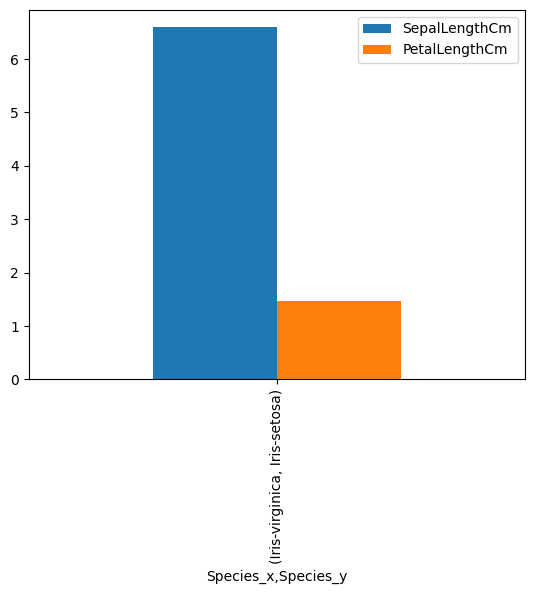

In [76]:
data['Key'] = range(1, len(data) + 1)
data1['Key'] = range(1, len(data1) + 1)
a = data.merge(data1, on='Key', how='inner').drop(columns='Key', axis=1)
a.groupby(['Species_x','Species_y'])[['SepalLengthCm','PetalLengthCm']].mean().plot(kind='bar')


### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [79]:
data.merge(data1, on='Key', how='inner').drop(columns='Key', axis=1).sample(10)

,Id_x,SepalLengthCm,SepalWidthCm,Species_x,index,Id_y,PetalLengthCm,PetalWidthCm,Species_y
35,136,7.7,3.0,Iris-virginica,35,36,1.2,0.2,Iris-setosa
4,105,6.5,3.0,Iris-virginica,4,5,1.4,0.2,Iris-setosa
2,103,7.1,3.0,Iris-virginica,2,3,1.3,0.2,Iris-setosa
43,144,6.8,3.2,Iris-virginica,43,44,1.6,0.6,Iris-setosa
11,112,6.4,2.7,Iris-virginica,11,12,1.6,0.2,Iris-setosa
33,134,6.3,2.8,Iris-virginica,33,34,1.4,0.2,Iris-setosa
46,147,6.3,2.5,Iris-virginica,46,47,1.6,0.2,Iris-setosa
41,142,6.9,3.1,Iris-virginica,41,42,1.3,0.3,Iris-setosa
7,108,7.3,2.9,Iris-virginica,7,8,1.5,0.2,Iris-setosa
40,141,6.7,3.1,Iris-virginica,40,41,1.3,0.3,Iris-setosa


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [84]:
a=data.merge(data1, on='Key', how='inner').drop(columns='Key', axis=1)
a.head(3)

,Id_x,SepalLengthCm,SepalWidthCm,Species_x,index,Id_y,PetalLengthCm,PetalWidthCm,Species_y
0,101,6.3,3.3,Iris-virginica,0,1,1.4,0.2,Iris-setosa
1,102,5.8,2.7,Iris-virginica,1,2,1.4,0.2,Iris-setosa
2,103,7.1,3.0,Iris-virginica,2,3,1.3,0.2,Iris-setosa


In [87]:
a.groupby(['Species_x','Species_y']).agg({'SepalWidthCm':['min','max'], 'PetalWidthCm':['min','max']}).reset_index()

Species_x    Species_y SepalWidthCm      PetalWidthCm     
                                        min  max          min  max
0  Iris-virginica  Iris-setosa          2.2  3.8          0.1  0.6